In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [2]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

/home/admin/anaconda3/envs/kitchen/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [11]:
cohort = "test0"

data_method = "data_beta"
eval_method = "eval_nominal"

scene = "mid_gate"

courses = [
    "traverse"
    ]   

roster = [
    "Maverick"
    ]

deployment = (cohort,courses[0],scene,eval_method)

In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# # Review the Rollout Data
# ps.plot_rollout_data(cohort)

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

In [ ]:
# # Train the Policy
tp.train_roster(cohort,roster,"histNet",200)

pl.plot_losses(cohort,roster,"histNet",use_log=True)

======================================================================
Cohort : test0          Network: commNet
======================================================================
----------------------------------------------------------------------
Student: Maverick   | Epochs: 300   | Data Size: 84224.0/1216.0               
Time: 3h 29m 16s    | Train: 0.0028 | Test: 0.0076
======================================================================

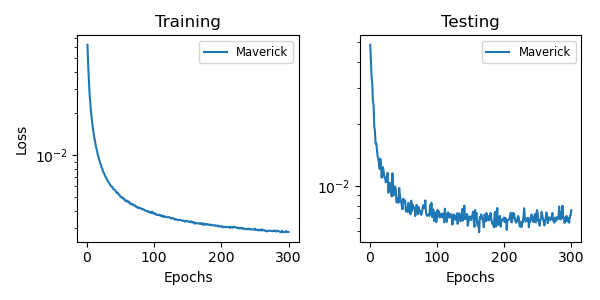

In [ ]:
# Train the Policy
# tp.train_roster(cohort,roster,"commNet",1200,regen=True)
# tp.train_roster(cohort,roster,"commNet",500,deploy,lim_sv=50)
# tp.train_roster(cohort,roster,"commNet",300,regen=True,deployment=deployment,lim_sv=50)
tp.train_roster(cohort,roster,"commNet",300,lim_sv=50)

pl.plot_losses(cohort,roster,"commNet",use_log=True)

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Plotting trajectories for expert...

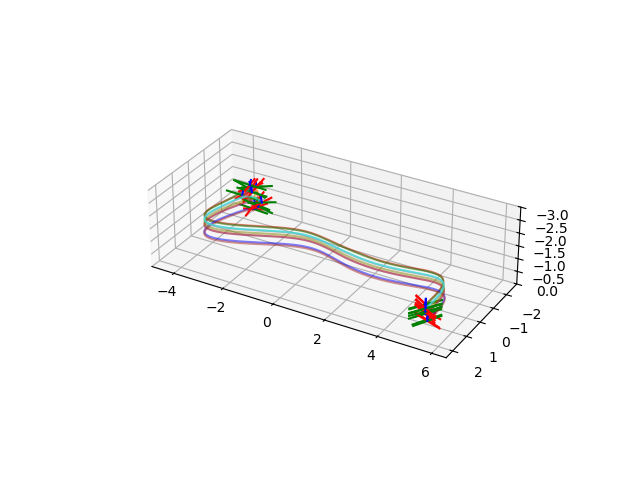

Plotting trajectories for Maverick...

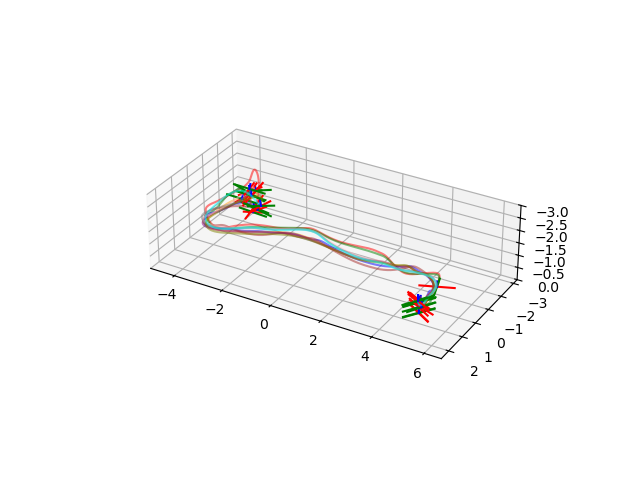

                      Deployment Summary                      
┏━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ Pilot    ┃ TTE Mean ┃ TTE Best ┃  PP  ┃ Hz Mean ┃ Hz Worst ┃
┡━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ expert   │   8.01   │   7.22   │ 0.00 │  0.69   │   0.64   │
│ Maverick │   8.48   │   6.98   │ 0.00 │  2.52   │   2.50   │
└──────────┴──────────┴──────────┴──────┴─────────┴──────────┘

In [12]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,deployment,roster,mode="visualize")
    pl.plot_deployments(cohort,course,roster,plot_show=True)